In [1]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import time
import math
import matplotlib.pyplot as plt

from src.data_loader import *
from src.index import *
from src.ticker_selection import *


from sklearn.preprocessing import MinMaxScaler

In [3]:
aapl = DataGenerator('db').data_search('AAPL')

기존 데이터 불러오기 성공


In [4]:
aapl

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
1992-12-11,0.511161,0.520089,0.511161,0.513393,0.422182,120187200.0
1992-12-14,0.513393,0.515625,0.506696,0.511161,0.420346,110510400.0
1992-12-15,0.506696,0.508929,0.495536,0.503348,0.413921,182537600.0
1992-12-16,0.502232,0.508929,0.486607,0.491071,0.403825,225926400.0
1992-12-17,0.493304,0.513393,0.493304,0.507813,0.417593,233867200.0
...,...,...,...,...,...,...
2022-10-28,148.199997,157.500000,147.820007,155.740005,155.740005,164762400.0
2022-10-31,153.160004,154.240005,151.919998,153.339996,153.339996,97943200.0
2022-11-01,155.080002,155.449997,149.130005,150.649994,150.649994,80379300.0


In [3]:
aapl.shape

(7534, 6)

In [4]:
aapl['rsi'] = rsi(aapl)
aapl['macd'] = macd(aapl)['macd']
aapl[['en_center', 'en_ub', 'en_lb']] = envelope(aapl)
aapl[['bo_center', 'bo_ub', 'bo_lb']] = bollinger(aapl)
aapl[['slow_k', 'slow_d']] = stochastic(aapl)
aapl['SMA(120)'] = sma(aapl,120)
aapl['SMA(60)'] = sma(aapl,60)
aapl['SMA(20)'] = sma(aapl,20)
aapl['SMA(5)']= sma(aapl,5)

In [5]:
aapl = stock_standard(aapl).calculator(standard=9)

In [6]:
aapl.drop('Standard', axis = 1, inplace = True)

In [7]:
aapl

,Open,High,Low,Close,Adj Close,Volume,rsi,macd,en_center,en_ub,...,SMA(5),s1,s2,s3,s4,s5,s6,s7,s8,s9
Datetime,,,,,,,,,,,,,,,,,,,,,
1993-05-21,0.524554,0.527902,0.506696,0.513393,0.423102,148198400.0,64.511646,0.01,0.386439,0.405761,...,0.419055,0.0,1.0,0.0,1.0,0,0,1.0,1.0,0.0
1993-05-24,0.506696,0.524554,0.506696,0.514509,0.424022,150315200.0,64.877338,0.01,0.386642,0.405974,...,0.421815,0.0,1.0,0.0,0.0,0,0,1.0,0.0,0.0
1993-05-25,0.506696,0.513393,0.497768,0.503348,0.414824,180723200.0,58.396195,0.01,0.386550,0.405877,...,0.423102,0.0,1.0,0.0,1.0,0,0,1.0,0.0,0.0
1993-05-26,0.500000,0.515625,0.494420,0.515625,0.424942,121564800.0,62.798638,0.01,0.386734,0.406071,...,0.423838,0.0,1.0,0.0,0.0,0,0,1.0,1.0,0.0
1993-05-27,0.515625,0.522321,0.511161,0.513393,0.423102,197288000.0,61.523974,0.01,0.387083,0.406437,...,0.421998,0.0,1.0,0.0,0.0,0,0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-24,147.190002,150.229996,146.000000,149.449997,149.449997,75981900.0,54.436786,-1.88,153.653999,161.336699,...,145.544000,0.0,0.0,0.0,1.0,0,1,0.0,1.0,0.0
2022-10-25,150.089996,152.490005,149.360001,152.339996,152.339996,74732300.0,58.207938,-1.12,153.236999,160.898849,...,147.262000,0.0,0.0,0.0,0.0,0,1,1.0,1.0,0.0
2022-10-25,150.089996,152.490005,149.360001,152.339996,152.339996,74732290.0,58.207938,-0.51,152.823199,160.464359,...,148.957999,0.0,1.0,0.0,0.0,0,1,0.0,0.0,0.0


In [8]:
aapl['Adj Close'] - aapl['Adj Close'].shift(1)

Datetime
1993-05-21         NaN
1993-05-24    0.000920
1993-05-25   -0.009198
1993-05-26    0.010118
1993-05-27   -0.001839
                ...   
2022-10-24    2.179993
2022-10-25    2.889999
2022-10-25    0.000000
2022-10-26   -2.989990
2022-10-27   -4.550003
Name: Adj Close, Length: 7415, dtype: float64

In [9]:
aapl['signal'] = (aapl['Adj Close'].diff(1)>0).astype(int)

In [10]:
scaler = MinMaxScaler() #데이터가 평균 0, 분산 1로 스케일링 
data_transform = scaler.fit_transform(aapl) # 스케일링으로 핏
data_transform[:,-10:] = data_transform[:,-10:].astype('int')
aapl_transform = pd.DataFrame(columns=aapl.columns, data=data_transform, index=aapl.index)

In [11]:
aapl_transform

,Open,High,Low,Close,Adj Close,Volume,rsi,macd,en_center,en_ub,...,s1,s2,s3,s4,s5,s6,s7,s8,s9,signal
Datetime,,,,,,,,,,,,,,,,,,,,,
1993-05-21,0.002244,0.002240,0.002195,0.002187,0.001791,0.014746,0.645574,0.470128,0.001546,0.001546,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1993-05-24,0.002146,0.002222,0.002195,0.002194,0.001796,0.015033,0.650376,0.470128,0.001547,0.001547,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1993-05-25,0.002146,0.002161,0.002145,0.002132,0.001745,0.019152,0.565270,0.470128,0.001547,0.001547,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1993-05-26,0.002110,0.002173,0.002126,0.002200,0.001801,0.011138,0.623080,0.470128,0.001548,0.001548,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1993-05-27,0.002195,0.002210,0.002220,0.002187,0.001791,0.021395,0.606342,0.470128,0.001550,0.001550,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-24,0.805824,0.821082,0.814978,0.820995,0.824411,0.004963,0.513278,0.335704,0.893306,0.893306,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2022-10-25,0.821713,0.833444,0.833749,0.836883,0.840364,0.004794,0.562798,0.389758,0.890880,0.890880,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2022-10-25,0.821713,0.833444,0.833749,0.836883,0.840364,0.004794,0.562798,0.433144,0.888472,0.888472,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [12]:
aapl_transform.shape

(7415, 30)

In [13]:
def window_slice(data, time_steps, for_periods): 
    """
    input:
     data: 날짜를 인덱스로 가지는 주식가격(Adj Close) 데이터
    output:
     X_train, y_train: 2013/1/1부터 2018-12/31까지의 데이터
     X_test : 2019년 동안의 데이터 
    time_steps: # input 데이터의 time steps
    for_periods: # output 데이터의 time steps
    """
    X = [] 
    y = [] 
    for i in range(time_steps, len(data.values) - 1):
        X.append(data.values[i-time_steps:i,:])
        y.append(data.values[i:i+for_periods,-1])
    X, y = np.array(X), np.array(y)

    return X, y 

In [14]:
X, y = window_slice(aapl_transform, 5, 1)

In [15]:
input_window = 5 # number of input steps
output_window = 1 # number of prediction steps, in this model its fixed to one
batch_size = 250
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 

df =  aapl 
close = np.array(df['Adj Close'])
logreturn = np.diff(np.log(close)) # Transform closing price to log returns, instead of using min-max scaler

csum_logreturn = logreturn.cumsum() # Cumulative sum of log returns

In [16]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()       
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:x.size(0), :]    

In [17]:
class TransAm(nn.Module):
    def __init__(self, feature_size=250, num_layers=1, dropout=0.1):
        super(TransAm, self).__init__()
        self.model_type = 'Transformer'
        
        self.src_mask = None
        self.pos_encoder = PositionalEncoding(feature_size)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=10, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)        
        self.decoder = nn.Linear(feature_size,1)
        self.init_weights()

    def init_weights(self):
        initrange = 0.1    
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self,src):
        if self.src_mask is None or self.src_mask.size(0) != len(src):
            device = src.device
            mask = self._generate_square_subsequent_mask(len(src)).to(device)
            self.src_mask = mask

        src = self.pos_encoder(src)
        output = self.transformer_encoder(src,self.src_mask)
        output = self.decoder(output)
        return output

    def _generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

In [18]:
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+output_window:i+tw+output_window]
        inout_seq.append((train_seq ,train_label))
    return torch.FloatTensor(inout_seq)

In [19]:
def get_data(data, split):
    """Split ratio of training data"""

    series = data
    
    split = round(split*len(series))
    train_data = series[:split]
    test_data = series[split:]

    train_data = train_data.cumsum()
    train_data = 2*train_data # Training data augmentation, increase amplitude for the model to better generalize.(Scaling by 2 is aribitrary)
                              # Similar to image transformation to allow model to train on wider data sets

    test_data = test_data.cumsum()

    train_sequence = create_inout_sequences(train_data,input_window)
    train_sequence = train_sequence[:-output_window]

    test_data = create_inout_sequences(test_data,input_window)
    test_data = test_data[:-output_window]

    return train_sequence.to(device), test_data.to(device)

In [20]:
def get_batch(source, i, batch_size):
    seq_len = min(batch_size, len(source) - 1 - i)
    data = source[i:i+seq_len]    
    input = torch.stack(torch.stack([item[0] for item in data]).chunk(input_window, 1))
    target = torch.stack(torch.stack([item[1] for item in data]).chunk(input_window, 1))
    return input, target

In [21]:
def train(train_data):
    model.train() # Turn on the evaluation mode
    total_loss = 0.
    start_time = time.time()

    for batch, i in enumerate(range(0, len(train_data) - 1, batch_size)):
        data, targets = get_batch(train_data, i,batch_size)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, targets)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.7)
        optimizer.step()

        total_loss += loss.item()
        log_interval = int(len(train_data) / batch_size / 5)
        if batch % log_interval == 0 and batch > 0:
            cur_loss = total_loss / log_interval
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches | '
                  'lr {:02.10f} | {:5.2f} ms | '
                  'loss {:5.7f}'.format(
                    epoch, batch, len(train_data) // batch_size, scheduler.get_lr()[0],
                    elapsed * 1000 / log_interval,
                    cur_loss))
            total_loss = 0
            start_time = time.time()

In [22]:
def evaluate(eval_model, data_source):
    eval_model.eval() # Turn on the evaluation mode
    total_loss = 0.
    eval_batch_size = 1000
    with torch.no_grad():
        for i in range(0, len(data_source) - 1, eval_batch_size):
            data, targets = get_batch(data_source, i, eval_batch_size)
            output = eval_model(data)            
            total_loss += len(data[0])* criterion(output, targets).cpu().item()
    return total_loss / len(data_source)

In [23]:
def model_forecast(model, seqence):
    model.eval() 
    total_loss = 0.
    test_result = torch.Tensor(0)    
    truth = torch.Tensor(0)

    seq = np.pad(seqence, (0, 3), mode='constant', constant_values=(0, 0))
    seq = create_inout_sequences(seq, input_window)
    seq = seq[:-output_window].to(device)

    seq, _ = get_batch(seq, 0, 1)
    with torch.no_grad():
        for i in range(0, output_window):            
            output = model(seq[-output_window:])                        
            seq = torch.cat((seq, output[-1:]))

    seq = seq.cpu().view(-1).numpy()

    return seq


In [24]:
def forecast_seq(model, sequences):
    """Sequences data has to been windowed and passed through device"""
    start_timer = time.time()
    model.eval() 
    forecast_seq = torch.Tensor(0)    
    actual = torch.Tensor(0)
    with torch.no_grad():
        for i in range(0, len(sequences) - 1):
            data, target = get_batch(sequences, i, 1)
            output = model(data)            
            forecast_seq = torch.cat((forecast_seq, output[-1].view(-1).cpu()), 0)
            actual = torch.cat((actual, target[-1].view(-1).cpu()), 0)
    timed = time.time()-start_timer
    print(f"{timed} sec")

    return forecast_seq, actual

In [25]:
train_data, val_data = get_data(logreturn, 0.6) # 60% train, 40% test split
model = TransAm().to(device)

In [26]:
criterion = nn.MSELoss() # Loss function
lr = 0.00005 # learning rate

optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)

epochs =  150 # Number of epochs

In [27]:
for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    train(train_data)
    
    if(epoch % epochs == 0): # Valid model after last training epoch
        val_loss = evaluate(model, val_data)
        print('-' * 80)
        print('| end of epoch {:3d} | time: {:5.2f}s | valid loss: {:5.7f}'.format(epoch, (time.time() - epoch_start_time), val_loss))
        print('-' * 80)

    else:   
        print('-' * 80)
        print('| end of epoch {:3d} | time: {:5.2f}s'.format(epoch, (time.time() - epoch_start_time)))
        print('-' * 80)

    scheduler.step() 

| epoch   1 |     3/   17 batches | lr 0.0000500000 | 120.37 ms | loss 1.5787448
| epoch   1 |     6/   17 batches | lr 0.0000500000 | 69.98 ms | loss 0.7876531
| epoch   1 |     9/   17 batches | lr 0.0000500000 | 69.91 ms | loss 0.8061639
| epoch   1 |    12/   17 batches | lr 0.0000500000 | 69.21 ms | loss 0.5193494
| epoch   1 |    15/   17 batches | lr 0.0000500000 | 69.45 ms | loss 3.0219179
--------------------------------------------------------------------------------
| end of epoch   1 | time:  1.33s
--------------------------------------------------------------------------------
| epoch   2 |     3/   17 batches | lr 0.0000451250 | 93.46 ms | loss 0.9177765
| epoch   2 |     6/   17 batches | lr 0.0000451250 | 69.20 ms | loss 3.4757352
| epoch   2 |     9/   17 batches | lr 0.0000451250 | 68.14 ms | loss 2.7498716
| epoch   2 |    12/   17 batches | lr 0.0000451250 | 68.16 ms | loss 3.8383832
| epoch   2 |    15/   17 batches | lr 0.0000451250 | 68.78 ms | loss 0.7274733
---

In [28]:
test_result, truth = forecast_seq(model, val_data)

2.5189208984375 sec


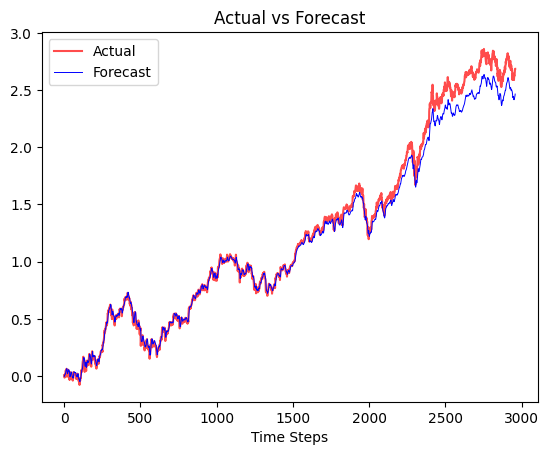

In [29]:
plt.plot(truth, color='red', alpha=0.7)
plt.plot(test_result, color='blue', linewidth=0.7)
plt.title('Actual vs Forecast')
plt.legend(['Actual', 'Forecast'])
plt.xlabel('Time Steps')
plt.show()

In [30]:
truth_1 = (aapl['Adj Close'].diff(1)>0).astype(int)

tensor([ 0.0094,  0.0075, -0.0134,  ...,  2.6663,  2.6855,  2.6855])

In [39]:
y_val = (truth.diff()>0).numpy().astype(int)

In [40]:
y_pred = (test_result.diff()>0).numpy().astype(int)

(2958,) (2958,)
(2, 2)
Confusion matrix:
 [[619 787]
 [633 919]]


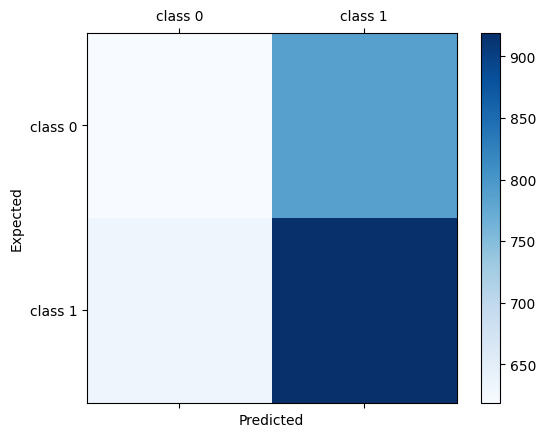

In [41]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
conf_mat = confusion_matrix(y_true=y_val, y_pred=y_pred)
print(y_val.shape, y_pred.shape)
print(conf_mat.shape)
print("Confusion matrix:\n", conf_mat)

labels = ['class 0', 'class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score
p = precision_score(y_val, y_pred)
print(p)
r = recall_score(y_val, y_pred)
print(r)
f1 = f1_score(y_val, y_pred)
print(f1)

0.5386869871043376
0.592139175257732
0.5641497851442603
